# Cojugate Prior

![Erfan](./assets/Erfan.jpg)
- by Erfan Fakoor
- Contact : e.f.simorgh@gmail.com
- Machine Learning - Octobor 2024

In this reading, we will elaborate on the notion of a conjugate prior for a likelihood function. With a conjugate prior the posterior is of the same type, e.g. for binomial likelihood the beta prior becomes a beta posterior. Conjugate priors are useful because they reduce Bayesian updating to modifying the parameters of the prior distribution (so-called hyperparameters) rather than computing integrals.

## Learning Goals

1. Introduction of conjugate prior
2. Understand the benefits of conjugate priors.
3. Usefulness of conjugate priors in exponential families
4. Be able to update a gamma prior given a poisson likelihood.
5. Be able to update a beta prior given a binomial likelihood.
6. Understand and be able to use the formula for updating a normal prior given a normal likelihood with known variance.
7. Understand and be able to use the formula for updating a multivariate normal prior given a multivariate normal likelihood with known covariance matrix.
8. Examining the limitations of conjugate priors.
9. Provide a guide to choose the right conjugate prior.

## Introduction
In Bayesian statistics, **Conjugate Priors** simplify the process of updating beliefs when new data is observed. Bayesian analysis combines prior beliefs and new evidence to form a posterior distribution. A conjugate prior is a prior distribution that, when combined with a likelihood function, results in a posterior distribution that belongs to the same family as the prior. This feature makes it easier to update beliefs since the mathematical form of the distribution remains consistent.

Let's define the key concepts:

1. **Prior distribution**: The distribution representing your initial belief or knowledge about a parameter before seeing the data. In other words the prior distribution represents what is known about a parameter before considering the new data.
$$p(\theta)$$
2. **Likelihood function**: The probability of observing the data given a particular parameter value. This is derived from the chosen statistical model.
$$p(x|\theta)$$
3. **Posterior distribution**: The updated distribution of the parameter after observing the data, calculated using Bayes' theorem. In other words the posterior distribution represents what is known after taking the new data into account. The posterior combines the prior and the likelihood. After observing the data, we use Bayes' rule to compute the posterior distribution:
$$
p(\theta | x) = \frac{p(x | \theta)p(\theta)}{p(x)} = \frac{p(x | \theta)p(\theta)}{\int_\theta p(x | \theta)p(\theta)d\theta}
$$

Conjugate priors are useful because they allow for straightforward, algebraic solutions when updating beliefs, without needing complex numerical methods. When a prior is conjugate to a likelihood function, the resulting posterior remains in the same family of distributions as the prior. Therefore, such priors are called conjugate priors, and the prior and posterior are referred to as conjugate distributions with respect to the likelihood function.

![p](./assets/photo1.jpg)


## Exponential Families

Conjugate priors are easily characterized when the distribution of $x$ belongs to an exponential family, in which case the likelihood takes the form
$$p(x|\theta) = h(x)exp[\theta^TT(x)-A(\theta)]$$
where:

- the base measure $h: \mathbb{R}^N \to \mathbb{R}_+ $ is a function that depends only on the $N \times 1$ vector of data $x$;
- the parameter $\theta$ is a $K \times 1$ vector;
- the sufficient statistic $T:\mathbb{R}^N \to \mathbb{R}^K$  is a vector-valued function of $x$;
- the log-partition function $A: \mathbb{R}^K \to \mathbb{R}$
- $\eta(\theta)^TT(x)$ is the dot product between $\eta$ and $T$.

A parametric family of conjugate priors for the above likelihood is formed by all the distributions such that
$$p(\theta)=\kappa(\chi,v)exp[\theta^T\chi-vA(\theta)]$$
where: 

- $\chi$ is a $K \times 1$ vector of parameters;
- $v$ is a scaler parameters;
- $\kappa: \mathbb{R}^{K+1} \to \mathbb{R}_+$ is a function that returns the normalization constant needed to make $p(\theta)$ a proper probability density (or mass) function.

The parameters $\chi$ and $v$ are called hyperparameters. 

Note that:
$$\int_\theta p(\theta)d\theta=1$$

implies that:

$$\kappa(\chi,v)=\frac{1}{\int_\theta{exp[\theta^T\chi-vA(\theta)]d\theta}}$$

As a consequence, the above parametric family of conjugate priors, called a natural family, contains all the distributions associated to couples of hyperparameters $(\chi,v)$ such that the integral in the denominator is well-defined and finite. 

Given the likelihood and the prior, the posterior is

$$p(\theta | x)=\kappa(\chi+T(X),v+1)exp[\theta^T(\chi+T(X))-(v+1)A(\theta)]$$

provided $\kappa(\chi+T(X),v+1)$ is well-defiend.

### Proof

The posterior is proportional to the prior times the likelihood:

$$p(\theta|x) \propto p(x|\theta)p(\theta)$$
$$=h(x)exp[\theta^TT(x)-A(\theta)]\kappa(\chi,v)exp[\theta^T\chi-vA(\theta)]$$
$$=h(x)\kappa(\chi,v)exp[\theta^T(\chi+T(X))-(v+1)A(\theta)]$$

Therefore,

$$p(\theta|x) \propto exp[\theta^T(\chi+T(X))-(v+1)A(\theta)]$$

where we know that the constant of proportionality is $\kappa(\chi+T(X),v+1)$.
## Example: Rental Car Service (Gamma-Poisson Conjugacy)

### Review

The Gamma distribution is a specialized form of the normal distribution that models various real-life phenomena, such as expected rainfall, the reliability of machinery, and any scenarios where only positive outcomes are possible. However, these situations are often imbalanced, leading to the characteristic skewed shape of the Gamma distribution.

The graph below shows the general shape of Gamma distribution:

![Gamma](./assets/Gamma.jpg)

A Poisson distribution is a discrete probability distribution. It gives the probability of an event happening a certain number of times $(k)$ within a given interval of time or space. The Poisson distribution has only one parameter, $(\lambda)$, which is the mean number of events. 

The graph below shows examples of Poisson distributions with different values of $\lambda$:

![Poisson](./assets/Poisson.jpg)

### Rental Car Service Problem

**The Gamma distribution serves as a conjugate prior for the Poisson likelihood, which is often used in modeling count data or events occurring over time.**

Suppose a rental car service operates in your city. Drivers can drop off and pick up cars anywhere inside the city limits. You can find and rent cars using an app.
Suppose you wish to find the probability that you can find a rental car within a short distance of your home address at any time of day. 
Over three days you look at the app and find the following number of cars within a short distance of your home address: $$X=[3,4,1]$$
Suppose we assume the data comes from a Poisson distribution. In that case, we can compute the maximum likelihood estimate of the parameters of the model, which is $\lambda=\frac{3+4+1}{3}\approx 2.67$. Using this maximum likelihood estimate, we can compute the probability that there will be at least one car available on a given day: $$p(x>0|\lambda \approx 2.67)=1−p(x=0|\lambda \approx 2.67 ) = 1 − \frac{2.67^0e^{-2.67}}{0!} \approx 0.93 $$
This is the Poisson distribution that is the most likely to have generated the observed data $X$. But the data could also have come from another Poisson distribution, e.g., one with $\lambda=3$, or $\lambda=2$, etc. In fact, there is an infinite number of Poisson distributions that could have generated the observed data. With relatively few data points, we should be quite uncertain about which exact Poisson distribution generated this data. intuitively we should instead take a weighted average of the probability of $p(x>0|\lambda)$ for each of those Poisson distributions, weighted by how likely they each are, given the data we've observed $X$. 

Generally, this quantity is known as the posterior predictive distribution $p(x|X)=\int_\theta {p(x|\theta)p(\theta|X)d\theta}$, where $x$ is a new data point, $X$ is the observed data and $/theta$ are the parameters of the model. Using Bayes' theorem we can expand $p(\theta|X)=\frac{p(X|\theta)p(\theta)}{p(X)}$, therefore $p(x|X)=\int_\theta{p(x|\theta)\frac{p(X|\theta)p(\theta)}{p(X)}d\theta}$. Generally, this integral is hard to compute. However, if you choose a conjugate prior distribution $p(\theta)$ , a closed-form expression can be derived. 

Now if we pick the Gamma distribution as our prior distribution over the rate of the Poisson distributions, then the posterior predictive is the negative binomial distribution, as we now. The Gamma distribution is parameterized by two hyperparameters $\alpha , \beta$, which we have to choose. By looking at plots of the gamma distribution, we pick $\alpha = \beta = 2$, which seems to be a reasonable prior for the average number of cars. The choice of prior hyperparameters is inherently subjective and based on prior knowledge. 

Given the prior hyperparameters $\alpha$ and $\beta$ we can compute the posterior hyperparameters $$\alpha' = \alpha+ \sum_{i=1} x_i = 2+3+4+1=10$$
and $$\beta'=\beta+n=2+3=5$$

Given the posterior hyperparameters, we can finally compute the posterior predictive of
$$p(x>0|X)=1-p(x=0|X)=1-NB(0|10,\frac{1}{1+5})\approx 0.84$$

This much more conservative estimate reflects the uncertainty in the model parameters, which the posterior predictive takes into account.

Maximum Likelihood Estimate (MLE) of lambda: 2.67
Posterior alpha: 10, Posterior beta: 5
Posterior predictive probability of at least one car: 0.84


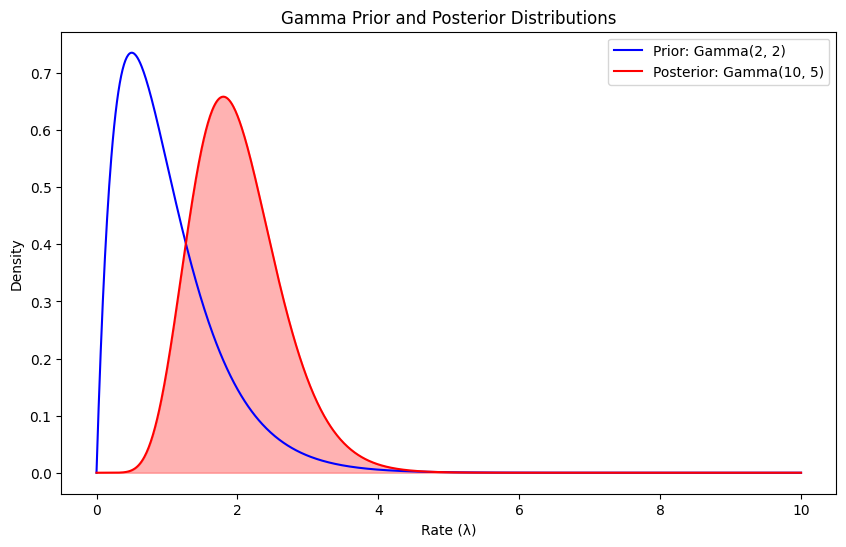

In [10]:
# Rental Car Service
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma, nbinom

# Step 1: Observed data (number of cars in 3 days)
X = [3, 4, 1]  # Number of cars observed within a short distance over 3 days

# Step 2: Maximum likelihood estimate for lambda (Poisson distribution parameter)
lambda_mle = np.mean(X)
print(f"Maximum Likelihood Estimate (MLE) of lambda: {lambda_mle:.2f}")

# Step 3: Define prior hyperparameters for the Gamma distribution (alpha, beta)
alpha_prior = 2
beta_prior = 2

# Step 4: Compute posterior hyperparameters
alpha_post = alpha_prior + sum(X)
beta_post = beta_prior + len(X)
print(f"Posterior alpha: {alpha_post}, Posterior beta: {beta_post}")

# Step 5: Compute posterior predictive probability using Negative Binomial distribution
# Negative Binomial parameters: p (probability of success), n (number of successes)
n_post = alpha_post
p_post = 1 / (1 + beta_post)

# Compute the probability that x > 0, i.e., at least one car is available
p_at_least_one_car = 1 - (1-p_post)**n_post
print(f"Posterior predictive probability of at least one car: {p_at_least_one_car:.2f}")

# Step 6: Visualize the Gamma prior and posterior distributions
x_vals = np.linspace(0, 10, 1000)
gamma_prior_pdf = gamma.pdf(x_vals, a=alpha_prior, scale=1/beta_prior)
gamma_post_pdf = gamma.pdf(x_vals, a=alpha_post, scale=1/beta_post)

plt.figure(figsize=(10, 6))
plt.plot(x_vals, gamma_prior_pdf, label=f'Prior: Gamma({alpha_prior}, {beta_prior})', color='blue')
plt.plot(x_vals, gamma_post_pdf, label=f'Posterior: Gamma({alpha_post}, {beta_post})', color='red')
plt.fill_between(x_vals, gamma_post_pdf, color='red', alpha=0.3)
plt.title('Gamma Prior and Posterior Distributions')
plt.xlabel('Rate (λ)')
plt.ylabel('Density')
plt.legend()
plt.show()

## Example: Email Marketing Campaign (Beta-Binomial Conjugacy)

### Review

The beta distribution is a family of continuous probability distributions set on the interval $[0, 1]$ having two positive shape parameters, expressed by $\alpha$ and $\beta$. These two parameters appear as exponents of the random variable and manage the shape of the distribution. Usually, the basic distribution is known as the Beta distribution of its first kind, and prime beta distribution is called for its second kind.

The graph below shows examples of Beta distributions with different values of $\alpha$ and $\beta$:

![beta](./assets/Beta.jpg)

Binomial distribution is a statistical distribution that summarizes the probability that a value will take one of two independent values under a given set of parameters or assumptions. A binomial distribution's expected value, or mean, is calculated by multiplying the number of trials $(n)$ by the probability of successes $(p)$, or $n \times p$.

The graph below shows examples of Beta distributions with different values of $p$ and $n$:

![binomial](./assets/binomial.jpg)

### Email Marketing Campaign Problem

**The Beta distribution is a conjugate prior for the Binomial likelihood. This is useful in scenarios like modeling the probability of success in a series of Bernoulli trials.** This means that if the likelihood function is binomial and the prior distribution is beta then
the posterior is also beta.

Imagine you're running an email marketing campaign, and you want to estimate the probability of a recipient clicking on a link in your email. You have some prior beliefs about this probability based on previous campaigns, and you collect data from this campaign.

From past campaigns, you believe that the click-through rate (CTR) follows a Beta distribution with parameters:

- $\alpha=5$ (indicating 5 prior successes)
- $\beta=15$ (indicating 15 prior failures)

This suggests that you expect the click-through rate to be around $\frac{5}{5+15}=0.25$

In your current campaign, you send out 100 emails and observe: 

- Number of Clicks: 30 (successes)
- Number of Non-Clicks: 70 (failures)

Now you want to update your beliefs about the click-through rate based on the new data.

Using the Beta-Binomial model:

- Prior: $\theta \sim Beta(5,15)$
- Likelihood: $X|\theta \sim Binomial(100,\theta)$
- Posterior: $\theta | X \sim Beta(\alpha+k, \beta+n-k)$
where $k$ is the number of successes (clicks) and $n$ is the number of trials (emails sent).

Calculating the Posterior:

- Prior Parameters:
  - $\alpha_ {prior}=5$
  - $\beta_{prior}=15$
- Data
  - $n=100$
  - $k=30$
- Posterior Parameters:
  - $\alpha_ {posterior}=5+30=35$
  - $\beta_{posterior}=15+(100-30)=85$

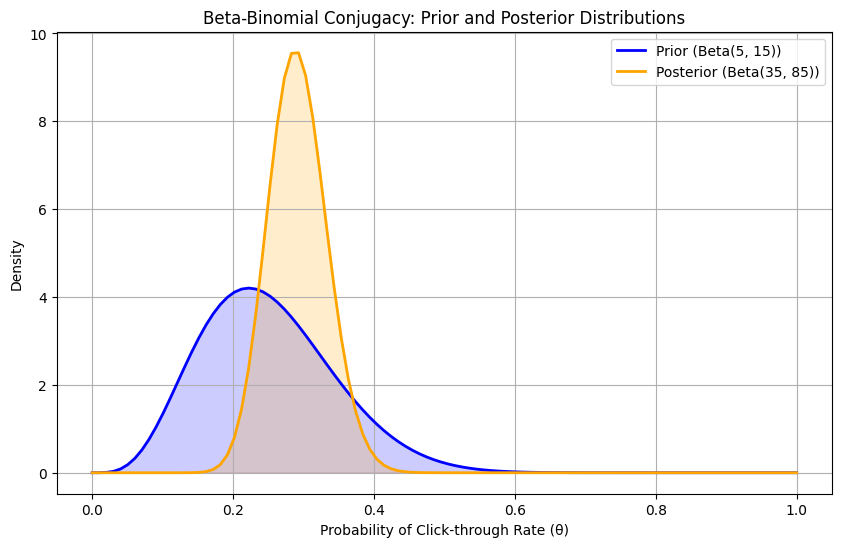

Posterior Distribution Parameters: Beta(35, 85)


In [11]:
# Email Marketing Campaign
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Define prior parameters
alpha_prior = 5
beta_prior = 15

# Define the data (number of trials and successes)
n_trials = 100
n_successes = 30

# Calculate posterior parameters
alpha_posterior = alpha_prior + n_successes
beta_posterior = beta_prior + (n_trials - n_successes)

# Define theta values
theta = np.linspace(0, 1, 100)

# Calculate prior and posterior distributions
prior_distribution = beta.pdf(theta, alpha_prior, beta_prior)
posterior_distribution = beta.pdf(theta, alpha_posterior, beta_posterior)

# Plotting the prior and posterior distributions
plt.figure(figsize=(10, 6))
plt.plot(theta, prior_distribution, label='Prior (Beta(5, 15))', color='blue', lw=2)
plt.plot(theta, posterior_distribution, label='Posterior (Beta(35, 85))', color='orange', lw=2)
plt.fill_between(theta, prior_distribution, alpha=0.2, color='blue')
plt.fill_between(theta, posterior_distribution, alpha=0.2, color='orange')
plt.title('Beta-Binomial Conjugacy: Prior and Posterior Distributions')
plt.xlabel('Probability of Click-through Rate (θ)')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.show()

# Display posterior parameters
print(f"Posterior Distribution Parameters: Beta({alpha_posterior}, {beta_posterior})")


## Example: Estimating the Mean Height of a Population (Normal-Normal Conjugacy)

### Review

Normal distribution, also known as the Gaussian distribution, is a probability distribution that is symmetric about the mean $(\mu)$ and variance $\sigma^2$, showing that data near the mean are more frequent in occurrence than data far from the mean. The normal distribution appears as a "bell curve" when graphed. 

The graph below shows examples of Normal distributions with different values of $\mu$ and $\sigma^2$:

![normal](./assets/normal.jpg)

### Estimating the Mean Height of a Population Problem
**When the likelihood function is Normal, using a Normal prior results in a Normal posterior. This conjugate relationship is particularly useful in many real-world applications involving Gaussian distributions.**

Suppose we are studying the heights of a population of individuals, which we assume follows a normal distribution. We want to estimate the mean height given some observed data.

We have a prior belief about the mean height, represented by a normal distribution:

- Prior Mean $(\mu_0)=170 cm$
- Propr Variance $(\sigma_0^2)= 25 cm^2$ (i.e., SD $\sigma_0=5cm$)

We gather some sample data (heights) from our population, which we assume follows a normal distribution:

- Sample Size $(n)=10$
- Sample Mean $(\overline{x})=175cm$
- Sample Variance $(s^2)=36 cm^2$ (i.e., SD $s=6 cm$)

Now let's solve this problem:

- The prior distribution is given by $N(\mu_0,\sigma_0^2)$
- The likelihood of observing the data given the mean $\mu$ is $N(\overline{x},\frac{s^2}{n})$.
- The posterior distribution will also be normally distributed. The posterior mean and variance can be calculated as follows:
  - Posterior Variance $(\sigma^2)$:
    $$\sigma^2=(\frac{1}{\sigma_0^2}+\frac{n}{s^2})^{-1}$$
  - Posterior Mean $(\mu)$:
    $$\mu=\sigma^2(\frac{\mu_0}{\sigma_0^2}+\frac{n\overline{x}}{s^2})$$

Posterior Mean: 174.37
Posterior Variance: 3.15


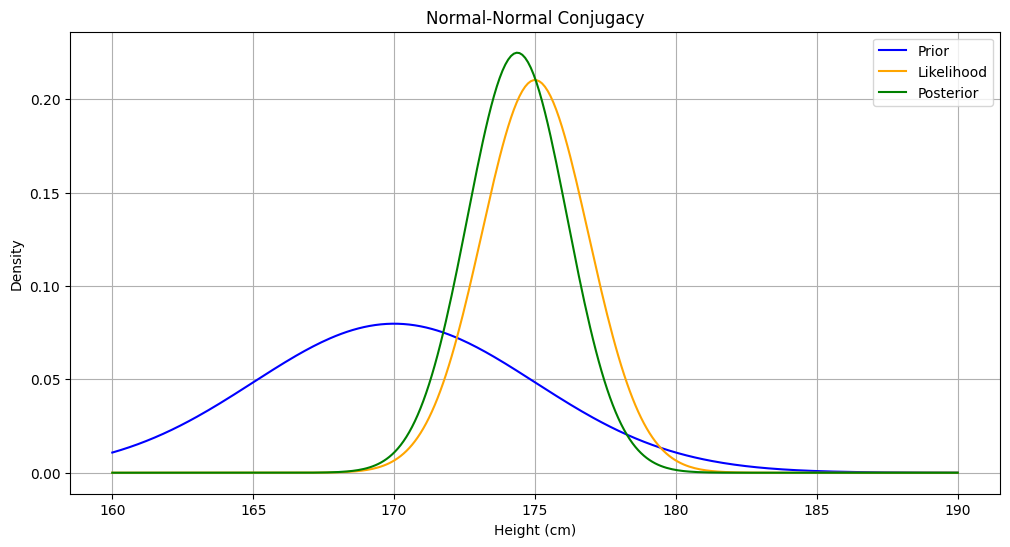

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Given parameters
mu_0 = 170    # Prior mean
sigma_0 = 5   # Prior standard deviation
sigma_0_sq = sigma_0 ** 2  # Prior variance

n = 10        # Sample size
x_bar = 175   # Sample mean
s = 6         # Sample standard deviation
s_sq = s ** 2 # Sample variance

# Calculate posterior variance
posterior_variance = 1 / (1 / sigma_0_sq + n / s_sq)

# Calculate posterior mean
posterior_mean = posterior_variance * (mu_0 / sigma_0_sq + n * x_bar / s_sq)

# Print results
print(f"Posterior Mean: {posterior_mean:.2f}")
print(f"Posterior Variance: {posterior_variance:.2f}")

# Visualizing the prior, likelihood, and posterior distributions
x = np.linspace(160, 190, 300)

# Prior distribution
prior = norm.pdf(x, mu_0, sigma_0)

# Likelihood distribution
likelihood = norm.pdf(x, x_bar, s / np.sqrt(n))

# Posterior distribution
posterior = norm.pdf(x, posterior_mean, np.sqrt(posterior_variance))

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(x=x, y=prior, label='Prior', color='blue')
sns.lineplot(x=x, y=likelihood, label='Likelihood', color='orange')
sns.lineplot(x=x, y=posterior, label='Posterior', color='green')
plt.title('Normal-Normal Conjugacy')
plt.xlabel('Height (cm)')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.show()


## Example: Analyzing The Heights And Weights (Multivariate Normal- Multivariate Normal Conjugacy)

### Review

The multivariate normal distribution is a generalization of the one-dimensional normal distribution to higher dimensions.

### Analyzing The Heights And Weights Problem

Suppose we are analyzing the heights and weights of individuals in a population. We believe both variables are normally distributed, and we want to estimate the mean vector of the joint distribution given some observed data.

We have a prior belief about the mean vector of the height and weight, represented by a multivariate normal distribution:

- Prior Mean Vector $(\mu_0)=[170cm , 65 kg]$ (mean height, mean weight)
- Prior Covariance Matrix $(\sum_0)= \begin{bmatrix}
25 & 0 \\
0 & 16
\end{bmatrix}
$ (i.e., 5 cm standard deviation for height, 4 kg standard deviation for weight, no correlation between height and weight)

We gather some sample data from our population, which we assume that the data follow a multivariate normal distribution with a known covariance matrix:

- Sample Size $(n): 10$
- Sample Mean Vector $(\overline{x}):[175cm,70kg]$
- Known Covariance Matrix $(\sum)= \begin{bmatrix}
36 & 0 \\
0 & 9
\end{bmatrix}$

Now let's solve this problem:

- The prior distribution is given by a multivariate normal distribution $N(\mu_0,\Sigma_0)$
- The likelihood is a multivariate normal distribution with known covariance, given by $N(\overline{x},\frac{\Sigma}{n})$.
- The posterior distribution will also be multivariate normal with updated mean vector and covariance matrix:
  - Posterior Covariance Matrix $(\Sigma_{post})$:
    $$\Sigma_{post}=(\Sigma_0^{-1}+n\Sigma^{-1})^{-1}$$
  - Posterior Mean Vector $(\mu_{post})$:
    $$\mu_{post}=\Sigma_{post}(\Sigma_0^{-1}{\mu_0}+n\Sigma^{-1}\overline{x})$$

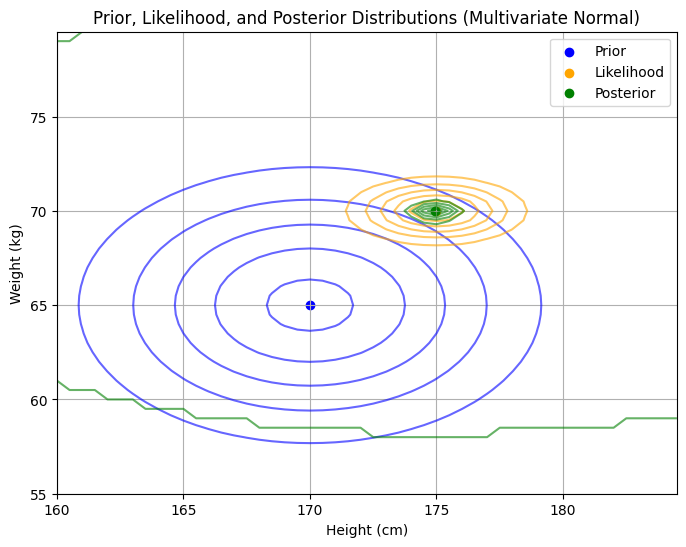

Posterior Mean Vector (μ_post):
[174.92902208  69.97203232]

Posterior Covariance Matrix (Σ_post):
[[0.35488959 0.        ]
 [0.         0.08949658]]


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import multivariate_normal

# Given parameters
mu_0 = np.array([170, 65])  # Prior mean vector [height, weight]
Sigma_0 = np.array([[25, 0], [0, 16]])  # Prior covariance matrix

n = 10  # Sample size
x_bar = np.array([175, 70])  # Sample mean vector [height, weight]
Sigma = np.array([[36, 0], [0, 9]])  # Known covariance matrix

# Inverses of the covariance matrices
Sigma_0_inv = np.linalg.inv(Sigma_0)
Sigma_inv = np.linalg.inv(Sigma / n)

# Compute the posterior covariance matrix
Sigma_post = np.linalg.inv(Sigma_0_inv + n * Sigma_inv)

# Compute the posterior mean vector
mu_post = Sigma_post @ (Sigma_0_inv @ mu_0 + n * Sigma_inv @ x_bar)

# Function to plot bivariate normal distribution
def plot_contours(mu, cov, label, color):
    x, y = np.mgrid[160:185:0.5, 55:80:0.5]
    pos = np.dstack((x, y))
    rv = multivariate_normal(mu, cov)
    plt.contour(x, y, rv.pdf(pos), levels=6, colors=color, alpha=0.6)
    plt.scatter(mu[0], mu[1], color=color, label=label)
    
# Create a plot
plt.figure(figsize=(8, 6))

# Plot prior
plot_contours(mu_0, Sigma_0, label='Prior', color='blue')

# Plot likelihood
plot_contours(x_bar, Sigma/n, label='Likelihood', color='orange')

# Plot posterior
plot_contours(mu_post, Sigma_post, label='Posterior', color='green')

# Add labels and title
plt.title('Prior, Likelihood, and Posterior Distributions (Multivariate Normal)')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

# Print posterior mean and covariance matrix
print("Posterior Mean Vector (μ_post):")
print(mu_post)
print("\nPosterior Covariance Matrix (Σ_post):")
print(Sigma_post)


## Benefits of Using Conjugate Priors
The use of conjugate priors offers several advantages in Bayesian inference:

- **Computational Simplicity**: Conjugate priors lead to posterior distributions that are easier to compute, as they belong to the same family of distributions as the prior.
- **Interpretability**: Because the prior and posterior distributions are of the same type, it is easier to interpret how the prior beliefs are updated with new information.
- **Analytical Solutions**: Conjugate priors often allow for closed-form solutions for the posterior distribution, avoiding the need for numerical approximation methods like Markov Chain Monte Carlo (MCMC) simulations.

## Limitations of Conjugate Priors
Despite their advantages, conjugate priors are not without limitations:

- **Flexibility**: Conjugate priors may not always represent the analyst's true prior beliefs, as they are chosen more for computational convenience than for their expressiveness.
- **Over-Simplification**: The use of conjugate priors can sometimes oversimplify the problem, potentially leading to biased or inaccurate posterior inferences.
- **Real-World Applications**: In complex real-world scenarios, the likelihood function may not have a known conjugate prior, necessitating alternative approaches.

## Choosing a Conjugate Prior
The choice of a conjugate prior depends on the nature of the data and the form of the likelihood function. In practice, the choice is often guided by the desire for computational efficiency and the availability of prior knowledge. While conjugate priors are convenient, they are not always the most appropriate choice. Sometimes, the true prior beliefs about a parameter might not fit neatly into a conjugate prior form, and in such cases, non-conjugate priors may be more suitable despite their computational complexity.
Here you can see a cheat sheet for choosing the right conjugate prior for different likelihood functions.
### Conjugate prior cheat sheet
Let n denote the number of observations. In all cases below, the data is assumed to consist of n points $x_1, \dots, x_n$ (which will be random vectors in the multivariate cases). 

#### When the likelihood function is a **discrete distribution**

| Likelihood  $$p(x_i \mid \theta)$$  | Model parameters $$\theta$$  |Conjugate prior (and posterior) distribution  $$p(\theta \mid \Theta),p(\theta \mid x,\Theta)=p(\theta \mid \Theta')$$     |Prior hyperparameters $$\Theta$$ |Posterior hyperparameters    $$\Theta'$$      | Interpretation of hyperparameters                     | Posterior predictive       $$p(\tilde{x} \mid X,\Theta)=p(\tilde{x} \mid \Theta')$$         |
|----------------|----------------------|----------------------|----------------------|------------------------------------|------------------------------------------------------|-------------------------------------|
|Bernoulli|p (probability)|Beta|$\alpha,\beta \in \mathbb{R}$|$\alpha + \sum_{i=1}^{n} x_i, \, \beta + n - \sum_{i=1}^{n} x_i$| $\alpha$  successes, $\beta$ failures|$$p(\tilde{x}=1)= \frac{\alpha'}{\alpha'+\beta'}$$ (Bernoulli)|
|Binomial with known number of trials, $m$|p (probability)|Beta|$\alpha,\beta \in \mathbb{R}$|$\alpha + \sum_{i=1}^{n} x_i, \, \beta + \sum_{i=1}^{n} N_i - \sum_{i=1}^{n} x_i$| $\alpha$  successes, $\beta$ failures|$$BetaBin(\tilde{x} \mid \alpha',\beta')$$ (beta-binomial)|
|Negative binomial with known failure number, $r$|p (probability)|Beta|$\alpha,\beta \in \mathbb{R}$|$\alpha +rn , \beta + \sum_{i=1}^{n} x_i $| $\alpha$ total successes, $\beta$ failures|$$BetaNegBin(\tilde{x} \mid \alpha',\beta')$$ (beta-negative binomial)|
|Poisson|$\lambda$ (rate)|Gamma|$\alpha,\beta $|$\alpha +\sum_{i=1}^{n} x_i , \beta + n $| $\alpha$ total occurrences in $\beta$ intervals |$$NB(\tilde{x} \mid \alpha',\frac{\beta'}{1+\beta'})$$ (negative binomial)|



#### When likelihood function is a **continuous distribution**
| Likelihood  $$p(x_i \mid \theta)$$  | Model parameters $$\theta$$  |Conjugate prior (and posterior) distribution  $$p(\theta \mid \Theta),p(\theta \mid x,\Theta)=p(\theta \mid \Theta')$$     |Prior hyperparameters $$\Theta$$ |Posterior hyperparameters    $$\Theta'$$      | Interpretation of hyperparameters                     | Posterior predictive       $$p(\tilde{x} \mid X,\Theta)=p(\tilde{x} \mid \Theta')$$         |
|----------------|----------------------|----------------------|----------------------|------------------------------------|------------------------------------------------------|-------------------------------------|
|Normal with known variance $\sigma^2$|$\mu$ (mean)|Normal|$\mu_0,\sigma_0^2$|$\frac{1}{\frac{1}{\sigma_0^2}+\frac{n}{\sigma^2}}$| mean was estimated from observations with total precision (sum of all individual precisions) $\frac{1}{\sigma_0^2}$ and with the sample mean $\mu_0$|$N(\tilde{x} \mid {\mu_0}', {\sigma_0^2}' + \sigma^2)$|
|Normal with known mean $\mu$|$\sigma^2$ (variance)|Inverse Gamma|$\alpha,\beta$|$\alpha+\frac{n}{2}, \beta+\frac{\sum_{i=1}^{n}{(x_i-\mu)}^2}{2}$|variance was estimated from $2\alpha$ observations with sample variance $\frac{\beta}{\alpha}$ (i.e. with sum of squared deviations $2\beta$, where deviations are from known mean $\mu$)|$t_{2\alpha'}(\tilde{x} \mid \mu, \sigma^2 = \frac{\beta'}{\alpha'})$|
|Uniform|$U(0,\theta)$|Pareto|$x_m,k$|$max\{x_1, \dots, x_n, x_m\}, k+n$| $k$ observations with maximum value $x_m$ ||
|Pareto with known minimum $x_m$|$\kappa$(shape)|Gamma|$\alpha,\beta$|$\alpha+n, \beta+\sum_{i=1}^{n}{ln\frac{x_i}{x_m}}$| $\alpha$ observations with sum $\beta$ of the order of magnitude of each observation (i.e. the logarithm of the ratio of each observation to the minimum $x_m$ ||
|Exponential|$\lambda$ (rate)|Gamma|$\alpha,\beta$|$\alpha+n, \beta+\sum_{i=1}^{n}x_i$|$\alpha$  observations that sum to $\beta$|$$Lomax(\tilde{x} \mid \beta', \alpha')$$ (Lomax distribution)|


you can see more from [here](https://en.wikipedia.org/wiki/Conjugate_prior#Table_of_conjugate_distributions).

## Conclusion
Conjugate priors are an effective asset in Bayesian statistics, providing an easier way to revise beliefs based on new information. They are especially helpful when a straightforward solution is needed or preferred. Nevertheless, it's important to weigh the decision to use conjugate priors against how accurate and representative the prior beliefs are. In certain situations, adopting more complex non-conjugate priors might offer a more realistic view of uncertainty and result in more informed choices.
## References

1. [Understanding Conjugate Priors in Bayesian Statistics.](https://deepai.org/machine-learning-glossary-and-terms/conjugate-prior)
2. [Schmidt, Mark, CPSC 540: Machine Learning, University of British Columbia, Winter 2020.](https://www.cs.ubc.ca/~schmidtm/Courses/540-W20/L27.pdf)
3. [Taboga, Marco, Conjugate prior.](https://www.statlect.com/fundamentals-of-statistics/conjugate-prior)
4. [Orloff, Jeremy and Bloom, Jonathan, Conjugate priors: Beta and normal, Class 15, 18.05, MIT University.](https://math.mit.edu/~dav/05.dir/class15-prep.pdf)
5. Bernardo, J. M., and Smith, A. F. M. (2009) Bayesian Theory, Wiley.
6. Robert, C. P. (2007) The Bayesian Choice, Springer.
7. [Turney,  Shaun, (2022) Poisson Distributions.](https://www.scribbr.com/statistics/poisson-distribution/)
8. [Metwalli, Sara, (2024) What Is the Gamma Distribution?](https://builtin.com/data-science/gamma-distribution)